Tujuan utama proyek ini adalah untuk melakukan analisis perilaku pengguna pada dua paket prabayar yang ditawarkan oleh Megaline, yaitu paket Surf dan paket Ultimate. Departemen periklanan ingin menentukan paket mana yang lebih menguntungkan secara finansial, sehingga mereka dapat mengalokasikan anggaran iklan secara efektif.

Langkah-langkah yang Akan Dilakukan:

Inisialisasi dan Pemahaman Data:

Memuat library yang diperlukan.
Memahami struktur data dan tipe variabel pada setiap dataset.
Mengidentifikasi kemungkinan kesalahan atau ketidaksesuaian dalam data.

Persiapan Data:

Mengkonversi format tanggal ke format yang benar.
Mengidentifikasi dan tangani nilai-nilai yang hilang atau anomali.
Menggabungkan data sesuai dengan kebutuhan analisis.

Analisis Penggunaan:

Menghitung total menit panggilan, jumlah pesan, dan volume data untuk setiap pengguna per bulan.
Menghitung pendapatan bulanan dari setiap pengguna berdasarkan paket yang mereka gunakan.

Deskripsi Statistik dan Visualisasi:

Menghitung rata-rata, varians, dan standar deviasi dari penggunaan per bulan.
Membuat histogram untuk memahami distribusi penggunaan.

Uji Hipotesis:

Uji hipotesis apakah rata-rata pendapatan dari pengguna Surf dan Ultimate berbeda.
Uji hipotesis apakah rata-rata pendapatan dari pengguna di wilayah NY-NJ berbeda dengan pengguna dari wilayah lain.

Kesimpulan:

Ringkas temuan dan hasil analisis.
Memberikan rekomendasi terkait paket prabayar yang lebih menguntungkan.
Setiap langkah akan melibatkan pemeriksaan kualitas data, pemrosesan data, analisis statistik, dan visualisasi untuk mendapatkan pemahaman yang komprehensif tentang perilaku pengguna. 

In [1]:
# Muat semua library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind
import scipy.stats as st


## Memuat Data

In [2]:
# Muat file data ke dalam DataFrame
plans_df = pd.read_csv('/datasets/megaline_plans.csv')
users_df = pd.read_csv('/datasets/megaline_users.csv')
calls_df = pd.read_csv('/datasets/megaline_calls.csv')
internet_df = pd.read_csv('/datasets/megaline_internet.csv')
messages_df = pd.read_csv('/datasets/megaline_messages.csv')


## Mempersiapkan Data

## Paket Prabayar

In [3]:
# Tampilkan informasi/rangkuman umum tentang DataFrame paket-paket prabayar
plans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Tampilkan sampel data tentang DataFrame paket-paket prabayar
plans_df.sample(2)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
1,1000,30720,3000,70,7,0.01,0.01,ultimate
0,50,15360,500,20,10,0.03,0.03,surf


Terdapat 2 baris (entri) dalam DataFrame ini, mewakili dua jenis paket: Ultimate dan Surf.

Dataframe memiliki total 8 kolom dengan tipe data yang berbeda.

Sampel Data Plans:
Berdasarkan sampel data, kita dapat melihat nilai-nilai untuk setiap kolom dalam entri "Ultimate" dan "Surf".

Data dalam DataFrame Plans sepertinya telah dimuat dengan baik dan tidak ada nilai yang hilang. 

Setiap paket memiliki parameter tarif yang jelas untuk menentukan biaya penggunaan yang melebihi alokasi bulanan.


## Memperbaiki Data

Terkait DataFrame plans_df, tidak ada tipe data yang perlu diperbaiki pada tahap ini, karena data tersebut sudah cukup lengkap.


## Memperkaya Kualitas Data

Terkait DataFrame plans_df, tidak ada kolom tambahan yang perlu ditambahkan pada tahap ini, karena data tersebut sudah cukup lengkap dan tidak ada kolom tambahan yang diperlukan berdasarkan deskripsi proyek.

## Pengguna

In [5]:
# Tampilkan informasi/rangkuman umum tentang DataFrame pengguna
users_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [6]:
# Tampilkan sampel data pengguna
users_df.sample(10)


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
320,1320,Bert,Wells,23,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-02-23,surf,NaN
47,1047,Yuk,French,22,"Indianapolis-Carmel-Anderson, IN MSA",2018-06-16,ultimate,NaN
167,1167,Rebbecca,Nicholson,47,"Denver-Aurora-Lakewood, CO MSA",2018-04-06,surf,NaN
314,1314,Brice,Morgan,35,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-03-06,ultimate,NaN
213,1213,Carl,Newman,47,"San Diego-Chula Vista-Carlsbad, CA MSA",2018-11-25,ultimate,NaN
150,1150,Earlie,Giles,46,"Houston-The Woodlands-Sugar Land, TX MSA",2018-09-19,ultimate,NaN
256,1256,Johnny,Wise,53,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-09-11,surf,NaN
328,1328,Tamesha,Huber,20,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018-02-10,surf,NaN
298,1298,Loyce,Cooley,53,"Nashville-Davidson–Murfreesboro–Franklin, TN MSA",2018-09-21,surf,2018-12-19
214,1214,Emil,Robles,34,"San Francisco-Oakland-Berkeley, CA MSA",2018-01-01,ultimate,NaN


Terdapat 500 entri dalam DataFrame users_df.

Kolom-kolomnya mencakup informasi seperti user_id, nama depan, nama belakang, usia, kota, tanggal mulai berlangganan (reg_date), jenis paket (plan), dan tanggal berhenti berlangganan (churn_date).

Kolom churn_date memiliki 34 nilai non-null, yang menunjukkan sejumlah pengguna telah berhenti berlangganan.

Sampel Data Users:
Dalam sampel data, setiap kolom menunjukkan nilai-nilai yang tampaknya normal.

Potensial Masalah:
Terdapat nilai null pada kolom churn_date, yang menunjukkan bahwa sebagian pengguna masih aktif berlangganan. Kita perlu memutuskan bagaimana menangani nilai null ini.


### Memperbaiki Data

In [7]:
# Mengubah tipe data kolom reg_date dan churn_date dengan format tanggal (dd, mm, yy)
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'], format='%Y-%m-%d')
users_df['churn_date'] = pd.to_datetime(users_df['churn_date'], format='%Y-%m-%d')

In [8]:
#Tangani nilai-nilai yang hilang pada kolom 'churn_date'
users_df['churn_date'].fillna(pd.NaT, inplace=True)

### Memperkaya Kualitas Data

In [9]:
# Menambahkan kolom active_status yang menunjukkan apakah pengguna masih aktif atau sudah berhenti berlangganan
users_df['active_status'] = np.where(users_df['churn_date'].isnull(), 'Active', 'Churned')

In [10]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   user_id        500 non-null    int64         
 1   first_name     500 non-null    object        
 2   last_name      500 non-null    object        
 3   age            500 non-null    int64         
 4   city           500 non-null    object        
 5   reg_date       500 non-null    datetime64[ns]
 6   plan           500 non-null    object        
 7   churn_date     34 non-null     datetime64[ns]
 8   active_status  500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(5)
memory usage: 35.3+ KB


In [11]:
users_df.sample(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,active_status
200,1200,Delmar,Cross,45,"Boston-Cambridge-Newton, MA-NH MSA",2018-11-27,surf,NaT,Active
326,1326,Johnathon,Branch,21,"Greensboro-High Point, NC MSA",2018-02-06,surf,NaT,Active
124,1124,Jenell,Navarro,48,"New Haven-Milford, CT MSA",2018-02-19,ultimate,NaT,Active
267,1267,Gia,Parker,53,"St. Louis, MO-IL MSA",2018-03-12,surf,NaT,Active
353,1353,Emerson,Whitfield,56,"North Port-Sarasota-Bradenton, FL MSA",2018-03-27,surf,NaT,Active


## Panggilan

In [12]:
# Tampilkan informasi/rangkuman umum tentang DataFrame panggilan
calls_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [13]:
# Tampilkan sampel data berisi panggilan
calls_df.sample(5)


,id,user_id,call_date,duration
107325,1381_62,1381,2018-12-10,4.72
13479,1057_358,1057,2018-10-07,0.13
87007,1320_676,1320,2018-10-27,1.07
120204,1418_88,1418,2018-09-06,10.09
36741,1140_25,1140,2018-10-24,0.00


Informasi DataFrame Calls:
Terdapat 137,735 entri dalam DataFrame calls_df.
DataFrame ini mencakup kolom-kolom seperti id (ID panggilan unik), user_id (ID pengguna), call_date (tanggal panggilan), dan duration (durasi panggilan dalam menit).
Tipe data yang benar telah diterapkan untuk masing-masing kolom, kecuali untuk kolom call_date mungkin harusnya kita mengubah tipe data nya ke datetime.

Sampel Data Calls:
Sampel data menunjukkan bahwa tidak ada masalah yang mencolok, dan durasi panggilan direpresentasikan dalam format float64.
Tidak ada nilai yang hilang pada DataFrame, yang merupakan hal yang baik.

### Memperbaiki Data

In [14]:
# Mengubah tipe data kolom 'call_date' menjadi datetime untuk memastikan urutan yang benar dalam pengelompokan
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'], format='%Y-%m-%d')


### Memperkaya Kualitas Data

In [15]:
# Ekstrak bulan dan tahun dari kolom 'call_date'
calls_df['month_year'] = calls_df['call_date'].dt.to_period('M')

In [16]:
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id          137735 non-null  object        
 1   user_id     137735 non-null  int64         
 2   call_date   137735 non-null  datetime64[ns]
 3   duration    137735 non-null  float64       
 4   month_year  137735 non-null  period[M]     
dtypes: datetime64[ns](1), float64(1), int64(1), object(1), period[M](1)
memory usage: 5.3+ MB


In [17]:
calls_df.sample(5)

,id,user_id,call_date,duration,month_year
130629,1470_78,1470,2018-05-25,0.00,2018-05
22969,1084_16,1084,2018-11-16,4.12,2018-11
1690,1009_112,1009,2018-10-25,4.70,2018-10
135350,1491_203,1491,2018-06-08,12.98,2018-06
34371,1127_213,1127,2018-07-23,8.26,2018-07


## Pesan/SMS

In [18]:
# Tampilkan informasi/rangkuman umum tentang DataFrame SMS
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [19]:
# Tampilkan sampel data untuk SMS
messages_df.sample(5)


,id,user_id,message_date
65024,1416_15,1416,2018-12-27
30655,1193_320,1193,2018-08-04
56357,1356_28,1356,2018-09-29
53328,1339_462,1339,2018-10-12
1887,1019_59,1019,2018-11-26


Terdapat 76,051 entri dalam DataFrame messages_df.
DataFrame ini mencakup kolom-kolom seperti id (ID SMS unik), user_id (ID pengguna), dan message_date (tanggal SMS).
Sampel data menunjukkan bahwa tidak ada masalah yang mencolok, dan tanggal SMS direpresentasikan dalam format object. Tipe data yang benar telah diterapkan untuk masing-masing kolom, kecuali kolom message_date sebaiknya kita ubah ke type data datetime .



### Memperbaiki Data

In [20]:
# Mengubah tipe data kolom 'message_date' menjadi datetime untuk memastikan urutan yang benar dalam pengelompokan
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'], format='%Y-%m-%d')

### Memperkaya Kualitas Data

In [21]:
# Ekstrak bulan dan tahun dari kolom 'message_date'
messages_df['month_year'] = messages_df['message_date'].dt.to_period('M')

In [22]:
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   month_year    76051 non-null  period[M]     
dtypes: datetime64[ns](1), int64(1), object(1), period[M](1)
memory usage: 2.3+ MB


In [23]:
messages_df.sample(5)

,id,user_id,message_date,month_year
49396,1328_354,1328,2018-06-21,2018-06
46902,1320_146,1320,2018-10-27,2018-10
7542,1059_425,1059,2018-08-31,2018-08
39873,1258_320,1258,2018-09-19,2018-09
17531,1114_520,1114,2018-11-05,2018-11


## Internet

In [24]:
# Tampilkan informasi/rangkuman umum tentang DataFrame internet
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [25]:
# Tampilkan sampel data untuk traffic internet
internet_df.sample(5)

,id,user_id,session_date,mb_used
8688,1045_404,1045,2018-11-18,172.19
68837,1321_246,1321,2018-12-10,518.77
38247,1171_618,1171,2018-09-08,509.36
53803,1243_105,1243,2018-11-24,0.00
92015,1427_20,1427,2018-12-17,230.45


Terdapat 104,825 entri dalam DataFrame internet_df.
DataFrame ini mencakup kolom-kolom seperti id (ID sesi web unik), user_id (ID pengguna), session_date (tanggal sesi web), dan mb_used (volume data yang dihabiskan selama sesi dalam megabyte).
Tipe data yang benar telah diterapkan untuk masing-masing kolom, kecuali Tipe data pada kolom session_date sebaiknya diubah menjadi tipe data datetime.
Sampel data menunjukkan bahwa tidak ada masalah yang mencolok.



### Memperbaiki Data

In [26]:
# Mengubah tipe data kolom 'session_date' menjadi datetime untuk memastikan urutan yang benar dalam pengelompokan
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'], format='%Y-%m-%d')

### Memperkaya Kualitas Data

In [27]:
# Ekstrak bulan dan tahun dari kolom 'session_date'
internet_df['month_year'] = internet_df['session_date'].dt.to_period('M')

In [28]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   month_year    104825 non-null  period[M]     
dtypes: datetime64[ns](1), float64(1), int64(1), object(1), period[M](1)
memory usage: 4.0+ MB


In [29]:
internet_df.sample(5)

,id,user_id,session_date,mb_used,month_year
97817,1460_516,1460,2018-08-23,1010.21,2018-08
13418,1062_388,1062,2018-03-17,607.66,2018-03
43321,1193_117,1193,2018-10-11,626.46,2018-10
93788,1438_30,1438,2018-10-08,11.16,2018-10
94142,1439_195,1439,2018-12-25,925.18,2018-12


## Mempelajari Syarat dan Kondisi Terkait Paket Prabayar

In [30]:
# Tampilkan persyaratan paket prabayar dan pastikan Anda memahaminya
print(plans_df)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


A. Surf :

1. messages_included: 50 SMS
2. mb_per_month_included: 15,360 MB (15 GB) data per bulan
3. minutes_included: 500 menit panggilan per bulan
4. usd_monthly_pay: Biaya bulanan 20 Dolar
5. usd_per_gb: Biaya tambahan 10 Dolar per gigabyte jika melebihi alokasi paket
6. usd_per_message: Biaya tambahan 0.03 Dolar per SMS jika melebihi alokasi paket
7. usd_per_minute: Biaya tambahan 0.03 Dolar per menit panggilan jika melebihi alokasi paket


B. Ultimate :

1. messages_included: 1,000 SMS
2. mb_per_month_included: 30,720 MB (30 GB) data per bulan
3. minutes_included: 3,000 menit panggilan per bulan
4. usd_monthly_pay: Biaya bulanan 70 Dolar
5. usd_per_gb: Biaya tambahan 7 Dolar per gigabyte jika melebihi alokasi paket
6. usd_per_message: Biaya tambahan 0.01 Dolar per SMS jika melebihi alokasi paket
7. usd_per_minute: Biaya tambahan 0.01 Dolar per menit panggilan jika melebihi alokasi paket


Analisis Singkat:
Paket Surf memiliki alokasi lebih rendah untuk pesan SMS, volume data, dan menit panggilan dibandingkan dengan Ultimate Package.
Ultimate Package menawarkan alokasi yang jauh lebih besar untuk semua kategori, namun biaya bulanannya juga lebih tinggi.
Biaya tambahan dikenakan jika pengguna melebihi alokasi paket untuk SMS, data, atau menit panggilan, dengan tarif yang berbeda untuk masing-masing.

## Mengagregasi Data per Pengguna



In [31]:
# Hitung jumlah panggilan yang dilakukan oleh setiap pengguna per bulan. Simpan hasilnya.
user_calls_count = calls_df.groupby(['user_id', 'month_year']).agg({'id': 'count'}).reset_index()

# Memberikan nama yang lebih deskriptif pada kolom hasil
user_calls_count.columns = ['user_id', 'month_year', 'total_calls']

print(user_calls_count)


      user_id month_year  total_calls
0        1000    2018-12           16
1        1001    2018-08           27
2        1001    2018-09           49
3        1001    2018-10           65
4        1001    2018-11           64
...       ...        ...          ...
2253     1498    2018-12           39
2254     1499    2018-09           41
2255     1499    2018-10           53
2256     1499    2018-11           45
2257     1499    2018-12           65

[2258 rows x 3 columns]


In [32]:
# Hitung jumlah menit yang dihabiskan oleh setiap pengguna untuk melakukan panggilan per bulan. Simpan hasilnya.
user_calls_duration = calls_df.groupby(['user_id', 'month_year']).agg({'id': 'count', 'duration': 'sum'}).reset_index()

# Memberikan nama yang lebih deskriptif pada kolom hasil
user_calls_duration.columns = ['user_id', 'month_year', 'total_calls', 'total_minutes']

print(user_calls_duration)

      user_id month_year  total_calls  total_minutes
0        1000    2018-12           16         116.83
1        1001    2018-08           27         171.14
2        1001    2018-09           49         297.69
3        1001    2018-10           65         374.11
4        1001    2018-11           64         404.59
...       ...        ...          ...            ...
2253     1498    2018-12           39         324.77
2254     1499    2018-09           41         330.37
2255     1499    2018-10           53         363.28
2256     1499    2018-11           45         288.56
2257     1499    2018-12           65         468.10

[2258 rows x 4 columns]


In [33]:
# Hitung jumlah SMS yang dikirim oleh setiap pengguna per bulan. Simpan hasilnya.
user_messages_monthly = messages_df.groupby(['user_id', 'month_year']).agg({'id': 'count'}).reset_index()

# Memberikan nama yang lebih deskriptif pada kolom hasil
user_messages_monthly.columns = ['user_id', 'month_year', 'total_messages']

print(user_messages_monthly)

      user_id month_year  total_messages
0        1000    2018-12              11
1        1001    2018-08              30
2        1001    2018-09              44
3        1001    2018-10              53
4        1001    2018-11              36
...       ...        ...             ...
1801     1496    2018-09              21
1802     1496    2018-10              18
1803     1496    2018-11              13
1804     1496    2018-12              11
1805     1497    2018-12              50

[1806 rows x 3 columns]


In [34]:
# Hitung volume traffic internet yang digunakan oleh setiap pengguna per bulan. Simpan hasilnya.
user_internet_monthly = internet_df.groupby(['user_id', 'month_year']).agg({'id': 'count', 'mb_used': 'sum'}).reset_index()

# Memberikan nama yang lebih deskriptif pada kolom hasil
user_internet_monthly.columns = ['user_id', 'month_year', 'total_sessions', 'total_mb_used']

print(user_internet_monthly)

      user_id month_year  total_sessions  total_mb_used
0        1000    2018-12               5        1901.47
1        1001    2018-08              25        6919.15
2        1001    2018-09              53       13314.82
3        1001    2018-10              56       22330.49
4        1001    2018-11              51       18504.30
...       ...        ...             ...            ...
2272     1498    2018-12              65       23137.69
2273     1499    2018-09              45       12984.76
2274     1499    2018-10              61       19492.43
2275     1499    2018-11              49       16813.83
2276     1499    2018-12              65       22059.21

[2277 rows x 4 columns]


In [35]:
# Gabungkan data panggilan, menit, SMS, dan internet berdasarkan user_id dan month (bulan)
user_monthly_data = pd.merge(user_calls_count, user_calls_duration, on=['user_id', 'month_year'], how='outer')
user_monthly_data = pd.merge(user_monthly_data, user_messages_monthly, on=['user_id', 'month_year'], how='outer')
user_monthly_data = pd.merge(user_monthly_data, user_internet_monthly, on=['user_id', 'month_year'], how='outer')

# Gabungkan user_monthly_data dan user_df berdasarkan user_id
user_monthly_data = pd.merge(user_monthly_data, users_df[['user_id', 'city']], on='user_id', how='left')

# Periksa hasilnya
user_monthly_data.sample(5)


,user_id,month_year,total_calls_x,total_calls_y,total_minutes,total_messages,total_sessions,total_mb_used,city
214,1051,2018-12,29.0,29.0,164.92,60.0,30.0,10369.73,"San Diego-Chula Vista-Carlsbad, CA MSA"
2282,1194,2018-12,NaN,NaN,NaN,56.0,63.0,31088.49,"San Jose-Sunnyvale-Santa Clara, CA MSA"
1664,1365,2018-07,155.0,155.0,1015.97,52.0,11.0,5979.39,"Grand Rapids-Kentwood, MI MSA"
1347,1296,2018-11,39.0,39.0,279.04,15.0,62.0,20186.52,"Miami-Fort Lauderdale-West Palm Beach, FL MSA"
402,1084,2018-11,123.0,123.0,844.98,93.0,66.0,20587.48,"Miami-Fort Lauderdale-West Palm Beach, FL MSA"


In [36]:
# Tambahkan informasi paket prabayarnya
user_monthly_data = pd.merge(user_monthly_data, users_df[['user_id', 'plan']], on='user_id', how='left')
print(user_monthly_data)

      user_id month_year  total_calls_x  total_calls_y  total_minutes  \
0        1000    2018-12           16.0           16.0         116.83   
1        1001    2018-08           27.0           27.0         171.14   
2        1001    2018-09           49.0           49.0         297.69   
3        1001    2018-10           65.0           65.0         374.11   
4        1001    2018-11           64.0           64.0         404.59   
...       ...        ...            ...            ...            ...   
2288     1349    2018-12            NaN            NaN            NaN   
2289     1361    2018-05            NaN            NaN            NaN   
2290     1482    2018-10            NaN            NaN            NaN   
2291     1108    2018-12            NaN            NaN            NaN   
2292     1311    2018-06            NaN            NaN            NaN   

      total_messages  total_sessions  total_mb_used  \
0               11.0             5.0        1901.47   
1            

In [37]:
# Hitung total panggilan per bulan
user_monthly_data['total_calls'] = calls_df.groupby(['user_id', 'month_year'])['duration'].count().reset_index()['duration']
print(user_monthly_data)

      user_id month_year  total_calls_x  total_calls_y  total_minutes  \
0        1000    2018-12           16.0           16.0         116.83   
1        1001    2018-08           27.0           27.0         171.14   
2        1001    2018-09           49.0           49.0         297.69   
3        1001    2018-10           65.0           65.0         374.11   
4        1001    2018-11           64.0           64.0         404.59   
...       ...        ...            ...            ...            ...   
2288     1349    2018-12            NaN            NaN            NaN   
2289     1361    2018-05            NaN            NaN            NaN   
2290     1482    2018-10            NaN            NaN            NaN   
2291     1108    2018-12            NaN            NaN            NaN   
2292     1311    2018-06            NaN            NaN            NaN   

      total_messages  total_sessions  total_mb_used  \
0               11.0             5.0        1901.47   
1            

In [38]:
# Hitung pendapatan bulanan untuk setiap pengguna
def calculate_monthly_revenue(row):
    plan_name = row['plan']
    calls_over_limit = max(0, row['total_calls'] - plans_df.loc[plans_df['plan_name'] == plan_name, 'minutes_included'].values[0])
    messages_over_limit = max(0, row['total_messages'] - plans_df.loc[plans_df['plan_name'] == plan_name, 'messages_included'].values[0])
    internet_over_limit = max(0, row['total_mb_used'] - plans_df.loc[plans_df['plan_name'] == plan_name, 'mb_per_month_included'].values[0] / 1024)

    revenue_calls = calls_over_limit * plans_df.loc[plans_df['plan_name'] == plan_name, 'usd_per_minute'].values[0]
    revenue_messages = messages_over_limit * plans_df.loc[plans_df['plan_name'] == plan_name, 'usd_per_message'].values[0]
    revenue_internet = internet_over_limit * plans_df.loc[plans_df['plan_name'] == plan_name, 'usd_per_gb'].values[0]

    total_revenue = plans_df.loc[plans_df['plan_name'] == plan_name, 'usd_monthly_pay'].values[0] + revenue_calls + revenue_messages + revenue_internet
    return total_revenue

user_monthly_data['monthly_revenue'] = user_monthly_data.apply(calculate_monthly_revenue, axis=1)

# Tampilkan sample data
user_monthly_data.sample(5)

,user_id,month_year,total_calls_x,total_calls_y,total_minutes,total_messages,total_sessions,total_mb_used,city,plan,total_calls,monthly_revenue
913,1196,2018-01,42.0,42.0,272.56,23.0,15.0,8908.61,"Los Angeles-Long Beach-Anaheim, CA MSA",ultimate,42.0,62220.27
2082,1460,2018-05,8.0,8.0,49.43,5.0,5.0,2292.12,"Fresno, CA MSA",ultimate,8.0,15904.84
2022,1443,2018-11,23.0,23.0,176.93,5.0,36.0,12661.38,"Atlanta-Sandy Springs-Roswell, GA MSA",surf,23.0,126483.80
1401,1312,2018-08,61.0,61.0,510.36,38.0,76.0,25569.29,"Fresno, CA MSA",surf,61.0,255562.90
1206,1259,2018-12,24.0,24.0,177.98,36.0,3.0,1078.27,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",surf,24.0,10652.70


## Mempelajari Perilaku Pengguna

### Panggilan

<AxesSubplot:title={'center':'Durasi Rata-rata Panggilan per Paket'}, xlabel='Paket Prabayar', ylabel='Durasi Rata-rata (menit)'>

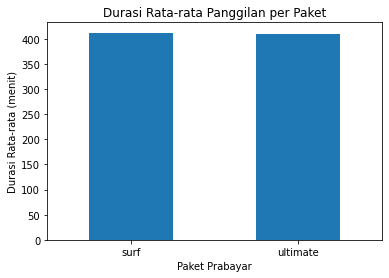

In [39]:
# Bandingkan durasi rata-rata panggilan setiap paket per bulannya. Buatlah sebuah diagram batang untuk memvisualisasikannya.
calls_avg_duration = user_monthly_data.groupby('plan')['total_minutes'].mean()
calls_avg_duration.plot(kind='bar', rot=0, xlabel='Paket Prabayar', ylabel='Durasi Rata-rata (menit)', title='Durasi Rata-rata Panggilan per Paket')

Pada diagram batang terlihat bahwa paket Surf dan paket Ultimate memiliki durasi rata-rata panggilan yang setara. Tidak terlihat perbedaan tampilan yang mencolok.

<AxesSubplot:title={'center':'Histogram Jumlah Menit Panggilan per Paket'}, ylabel='Frequency'>

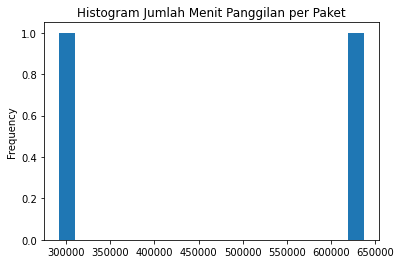

In [40]:
# Bandingkan jumlah menit yang dibutuhkan pengguna tiap paket per bulannya. Buatlah sebuah histogram.
calls_total_minutes = user_monthly_data.groupby('plan')['total_minutes'].sum()
calls_total_minutes.plot(kind='hist', bins=20, xlabel='Jumlah Menit', ylabel='Frekuensi', title='Histogram Jumlah Menit Panggilan per Paket')


Pada Histogram, ultimate dengan total minutes 292459.02 dan surf dengan total minutes 636691.24 memiliki Frequency yang setara antara. Tidak terlihat perbedaan mencolok pada Frequency keduanya.

In [41]:
# Hitung rata-rata dan varians dari durasi panggilan bulanan
calls_avg_variance = user_monthly_data.groupby('plan')['total_minutes'].agg(['mean', 'var'])
print(calls_avg_variance)


                mean           var
plan                              
surf      412.097890  47001.254231
ultimate  410.180954  50510.631705


1. Rata-Rata (Mean):

Pengguna paket "surf" memiliki rata-rata durasi panggilan bulanan sekitar 412.10 menit.
Pengguna paket "ultimate" memiliki rata-rata durasi panggilan bulanan sekitar 410.18 menit.

2. Varians (Var):

Varians durasi panggilan bulanan untuk pengguna paket "surf" sekitar 47001.25.
Varians durasi panggilan bulanan untuk pengguna paket "ultimate" sekitar 50510.63.


Meskipun rata-rata durasi panggilan bulanan antara pengguna paket "surf" dan "ultimate" relatif serupa, variasi dalam durasi panggilan bulanan lebih tinggi untuk pengguna paket "ultimate" (50510.63) dibandingkan dengan pengguna paket "surf" (47001.25). Varians yang lebih tinggi menunjukkan bahwa data durasi panggilan pengguna paket "ultimate" lebih tersebar atau memiliki variasi yang lebih besar daripada pengguna paket "surf".
Perbedaan rata-rata yang kecil (412.10 vs. 410.18) mungkin tidak signifikan secara praktis, tetapi variabilitas yang lebih tinggi pada pengguna paket "ultimate" mungkin menjadi pertimbangan.

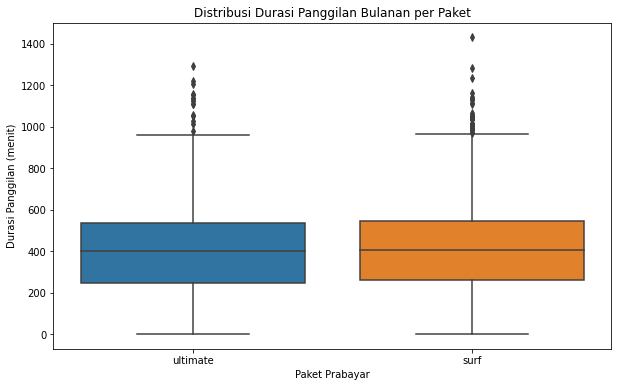

In [42]:
# Buatlah grafik boxplot untuk memvisualisasikan distribusi durasi panggilan bulanan
plt.figure(figsize=(10, 6))
sns.boxplot(x='plan', y='total_minutes', data=user_monthly_data)
plt.xlabel('Paket Prabayar')
plt.ylabel('Durasi Panggilan (menit)')
plt.title('Distribusi Durasi Panggilan Bulanan per Paket')
plt.show()

Berdasarkan boxplot, kita dapat melihat bahwa median durasi panggilan bulanan pada paket "Ultimate" dan "Surf" memiliki median yang hampir sama yaitu di durasi 400 menitan. Ini menunjukkan bahwa, secara umum, pengguna paket "Ultimate" dan "Surf" memiliki kecenderungan untuk memiliki durasi panggilan bulanan yang tidak jauh berbeda.

Lebar dari kotak interquartile range pada paket "Ultimate" dan "Surf" juga memiliki lebar yang sama, menunjukkan bahwa distribusi durasi panggilan bulanan pada paket "Ultimate" dan "Surf" sama sama tersebar atau memiliki variasi yang hampir sama. 

Perilaku pengguna yang berbeda secara signifikan dari mayoritas terlihat pada outlier pada paket "Surf" yang sampai menyentuh angka 1400 menitan. 


### Pesan/SMS

<AxesSubplot:title={'center':'Jumlah SMS per Paket'}, xlabel='Paket Prabayar', ylabel='Jumlah SMS'>

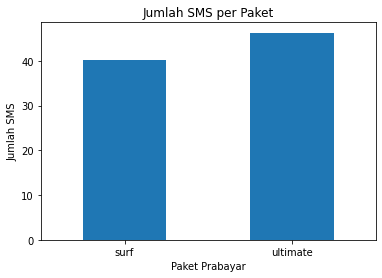

In [43]:
# Bandingkan jumlah SMS yang cenderung dikirim pengguna tiap paket per bulannya
sms_avg = user_monthly_data.groupby('plan')['total_messages'].mean()
sms_avg.plot(kind='bar', rot=0, xlabel='Paket Prabayar', ylabel='Jumlah SMS', title='Jumlah SMS per Paket')

Terlihat pada histogram Perbandingan jumlah SMS yang cenderung dikirim pengguna tiap paket per bulannya terlihat jelas paket Ultimate lebih tinggi jumlah sms nya dibandingkan dengan paket Surf. Hal ini dapat disebabkan karna paket ultimate memiliki lebih banyak alokasi SMS bulanan yaitu 1.000 sms dibandingkan dengan paket ultimate yang hanya 50 sms per bulan.

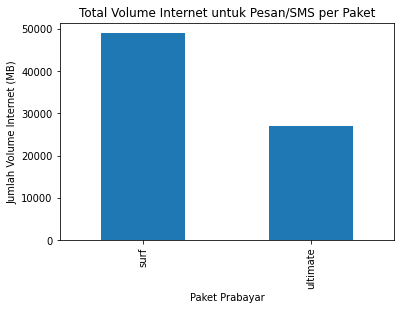

In [44]:
# Bandingkan jumlah traffic internet yang dihabiskan oleh pengguna per paket
internet_total_volume_sms = user_monthly_data.groupby('plan')['total_messages'].sum()
internet_total_volume_sms.plot(kind='bar', xlabel='Paket Prabayar', ylabel='Jumlah Volume Internet (MB)', title='Total Volume Internet untuk Pesan/SMS per Paket')
plt.show()

Pada histogram terlihat bahwa paket "Surf" memiliki jumlah volume internet untuk Pesan/SMS per Paket lebih tinggi dibandingkan dengan paket "Ultimate".
Berdasarkan kriteria paket yang tersedia, terdapat kemungkinan bahwa pengguna paket "Ultimate" memiliki alokasi kuota data yang lebih besar dibandingkan dengan paket "Surf". Meskipun paket "Ultimate" memiliki biaya bulanan yang lebih tinggi, pengguna mungkin tidak menggunakan secara maksimal kuota data yang disediakan oleh paket "Ultimate", sehingga volume internet untuk Pesan/SMS yang dihabiskan pada paket "Ultimate" dapat lebih rendah dibandingkan dengan paket "Surf".

In [45]:
# Hitung rata-rata dan varians dari SMS bulanan
sms_avg_variance = user_monthly_data.groupby('plan')['total_messages'].agg(['mean', 'var'])
print(sms_avg_variance)

               mean          var
plan                            
surf      40.109656  1091.344231
ultimate  46.296233  1085.183108


Rata-rata Jumlah SMS: 

Rata-rata jumlah SMS bulanan pada paket "Ultimate" (46.30) lebih tinggi dibandingkan dengan paket "Surf" (40.11). Hal ini menunjukkan bahwa pengguna paket "Ultimate" cenderung mengirim lebih banyak SMS setiap bulannya. Hal ini terlihat wajar karna paket "Ultimate" memiliki alokasi SMS bulanan yang lebih tinggi yaitu 1000 SMS per bulan.

Varians Jumlah SMS: 

Varians yang relatif rendah pada kedua paket menunjukkan bahwa sebagian besar pengguna dalam setiap paket memiliki jumlah SMS yang tidak jauh berbeda dari rata-rata. Varians yang rendah dapat mengindikasikan tingkat konsistensi yang tinggi dalam penggunaan SMS.


Berdasarkan hasil ini, terlihat bahwa pengguna paket "Ultimate" memiliki rata-rata jumlah SMS bulanan yang lebih tinggi dibandingkan dengan pengguna paket "Surf." Meskipun demikian, variasi dalam jumlah SMS tidak terlalu besar di kedua paket, menunjukkan bahwa sebagian besar pengguna dalam setiap paket memiliki perilaku yang konsisten dalam penggunaan SMS.

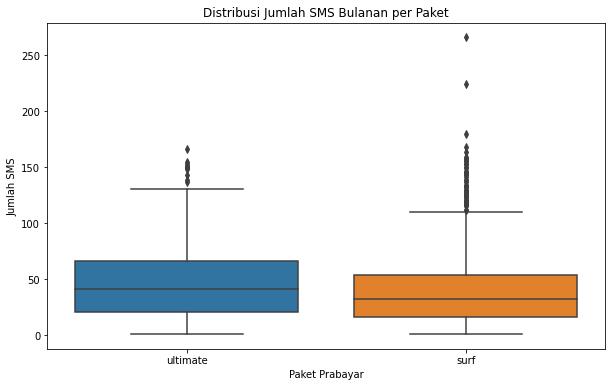

In [46]:
# Buatlah grafik boxplot untuk memvisualisasikan distribusi SMS bulanan
plt.figure(figsize=(10, 6))
sns.boxplot(x='plan', y='total_messages', data=user_monthly_data)
plt.xlabel('Paket Prabayar')
plt.ylabel('Jumlah SMS')
plt.title('Distribusi Jumlah SMS Bulanan per Paket')
plt.show()

Berdasarkan Distribusi Jumlah SMS Bulanan per Paket yang direpresentasikan melalui boxplot antara paket Surf dan Ultimate.

Median garis tengah pada kotak pada paket "Ultimate" terletak pada nilai yang lebih tinggi dibandingkan dengan paket "Surf." Hal ini menunjukkan bahwa nilai tengah dari distribusi jumlah SMS bulanan pada paket "Ultimate" lebih tinggi.
Rentang interkuartil kotak pada boxplot pada paket "Ultimate" juga lebih lebar, menunjukkan variasi yang lebih besar dalam jumlah SMS dibandingkan dengan paket "Surf."


Terdapat beberapa nilai outliers pada paket "Ultimate," dan "Surf" yang menunjukkan adanya pengguna dengan jumlah SMS yang signifikan dan mungkin di luar kebiasaan. Nilai outliers pada paket "Surf" terlihat lebih tinggi.

Distribusi Jumlah SMS Bulanan pada paket "Ultimate" cenderung memiliki nilai tengah yang lebih tinggi dan variasi yang lebih besar dibandingkan dengan paket "Surf."








### Internet

In [47]:
# Bandingkan durasi rata-rata Internet setiap paket per bulannya
internet_avg = user_monthly_data.groupby('plan')['total_mb_used'].mean()
print(internet_avg)

plan
surf        16717.702137
ultimate    17238.642253
Name: total_mb_used, dtype: float64


Berdasarkan hasil perbandingan durasi rata-rata penggunaan internet setiap paket per bulan,

Surf memiliki rata-rata penggunaan internet pada paket sekitar 16,717.70 MB per bulan.
Sedangkan Ultimate memiliki rata-rata penggunaan internet pada paket sedikit lebih tinggi, yaitu sekitar 17,238.64 MB per bulan.

Secara umum, penggunaan internet pada paket "Ultimate" cenderung sedikit lebih tinggi daripada paket "Surf."
Perbedaan ini mungkin disebabkan oleh batasan kuota internet yang lebih besar pada paket "Ultimate," yang memberikan pengguna lebih banyak fleksibilitas dalam penggunaan internet bulanan.

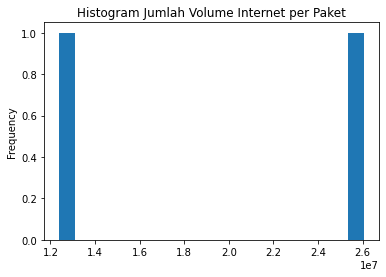

In [48]:
# Bandingkan jumlah volume internet yang dibutuhkan pengguna tiap paket per bulannya
internet_total_volume = user_monthly_data.groupby('plan')['total_mb_used'].sum()
internet_total_volume.plot(kind='hist', bins=20, xlabel='Volume Internet (MB)', ylabel='Frekuensi', title='Histogram Jumlah Volume Internet per Paket')
plt.show()

Pada histogram Jumlah Volume Internet per Paket terlihat antara kedua paket terlihat tidak ada perbedaan, keduanya memiliki Frequency yang setara.

In [49]:
# Hitung rata-rata dan varians dari internet bulanan
internet_avg_variance = user_monthly_data.groupby('plan')['total_mb_used'].agg(['mean', 'var'])
print(internet_avg_variance)

                  mean           var
plan                                
surf      16717.702137  6.216823e+07
ultimate  17238.642253  6.132485e+07


Berdasarkan hasil perhitungan rata-rata dan varians dari penggunaan internet bulanan:

1. Surf:

Rata-rata penggunaan internet pada paket "Surf" adalah sekitar 16,717.70 MB.
Varians dari penggunaan internet pada paket "Surf" adalah sekitar 62,168,230 MB.

2. Ultimate:

Rata-rata penggunaan internet pada paket "Ultimate" adalah sekitar 17,238.64 MB.
Varians dari penggunaan internet pada paket "Ultimate" adalah sekitar 61,324,850.


Rata-rata penggunaan internet cenderung lebih tinggi pada paket "Ultimate" daripada paket "Surf," menunjukkan bahwa pengguna paket "Ultimate" secara keseluruhan cenderung menggunakan lebih banyak data internet setiap bulan.
Varians yang relatif tinggi pada keduanya menunjukkan variasi yang signifikan dalam penggunaan internet di antara pengguna paket, baik "Surf" maupun "Ultimate."

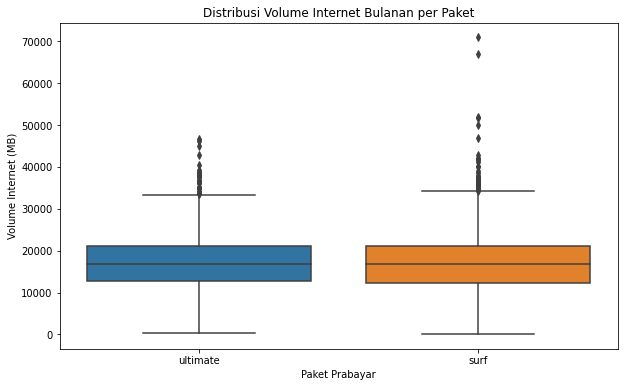

In [50]:
# Buatlah grafik boxplot untuk memvisualisasikan distribusi internet bulanan
plt.figure(figsize=(10, 6))
sns.boxplot(x='plan', y='total_mb_used', data=user_monthly_data)
plt.xlabel('Paket Prabayar')
plt.ylabel('Volume Internet (MB)')
plt.title('Distribusi Volume Internet Bulanan per Paket')
plt.show()

Distribusi Volume Internet Bulanan per Paket, sebagaimana ditunjukkan oleh boxplot, memberikan wawasan mendalam tentang variabilitas dan kecenderungan penggunaan internet di antara pengguna paket "Surf" dan "Ultimate".

Median / garis tengah kotak pada kedua paket nampak serupa, menunjukkan bahwa rata-rata penggunaan internet bulanan pada "Surf" dan "Ultimate" memiliki kecenderungan yang mirip.
Rentang interkuartil / lebar kotak pada kedua paket juga sama, menunjukkan bahwa sebagian besar pengguna di kedua paket memiliki penggunaan internet yang konsisten.

Outlier pada paket "Surf" terlihat lebih tersebar dan memiliki volume internet yang lebih tinggi, menandakan adanya variasi yang lebih besar dalam penggunaan internet oleh sebagian kecil pengguna. Outlier ini dapat mencerminkan beberapa pengguna "Surf" yang memiliki kebutuhan internet yang lebih tinggi atau lebih rendah daripada mayoritas.

Meskipun median dan rentang interkuartil menunjukkan kesamaan dalam perilaku penggunaan internet bulanan, paket "Surf" memiliki outlier yang lebih terpisah, menunjukkan variasi penggunaan internet yang lebih besar di antara pengguna paket ini. Akan tetapi mereka para pengguna "Surf" lebih memilih harga paket yang lebih murah karna harga nya lebih terjangkau.

## Pendapatan

In [51]:
# Hitung rata-rata pendapatan bulanan per paket
average_monthly_revenue = user_monthly_data.groupby('plan')['monthly_revenue'].mean()
print(average_monthly_revenue)

plan
surf        165454.475671
ultimate    120363.189528
Name: monthly_revenue, dtype: float64


Dari hasil perhitungan rata-rata pendapatan bulanan per paket, kita dapat mengidentifikasi perbedaan dalam kontribusi pendapatan antara pengguna paket "Surf" dan "Ultimate".

Rata-rata pendapatan bulanan untuk paket "Surf" 165,454 Dolar jauh lebih tinggi dibandingkan dengan paket "Ultimate" yang hanya 120,363 Dolar.

Berdasarkan data rata-rata pendapatan bulanan, paket "Surf" secara signifikan memberikan kontribusi lebih besar terhadap pendapatan dibandingkan dengan paket "Ultimate".

In [52]:
# Hitung varians pendapatan bulanan per paket
variance_monthly_revenue = user_monthly_data.groupby('plan')['monthly_revenue'].var()
print(variance_monthly_revenue)

plan
surf        6.421178e+09
ultimate    3.020892e+09
Name: monthly_revenue, dtype: float64


Dari hasil perhitungan varians pendapatan bulanan per paket, kita dapat melihat seberapa besar variasi atau sebaran data pendapatan untuk masing-masing paket.

Varians Pendapatan Bulanan:
Paket "Surf" memiliki varians pendapatan bulanan sekitar 6.42 miliar Dolar.
Paket "Ultimate" memiliki varians pendapatan bulanan sekitar 3.02 miliar Dolar.

Varians yang lebih tinggi pada paket "Surf" menunjukkan bahwa pendapatan bulanan pengguna paket ini memiliki variasi yang lebih besar dibandingkan dengan paket "Ultimate".

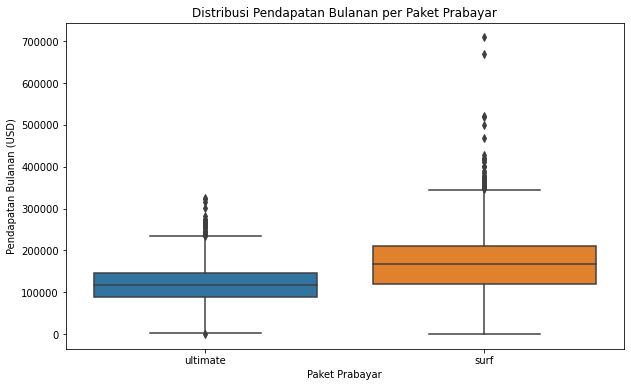

In [53]:
# Buat grafik boxplot untuk memvisualisasikan distribusi pendapatan bulanan per paket
plt.figure(figsize=(10, 6))
sns.boxplot(x='plan', y='monthly_revenue', data=user_monthly_data)
plt.xlabel('Paket Prabayar')
plt.ylabel('Pendapatan Bulanan (USD)')
plt.title('Distribusi Pendapatan Bulanan per Paket Prabayar')
plt.show()

Dari hasil boxplot yang menggambarkan distribusi pendapatan bulanan per paket prabayar (Surf dan Ultimate), kita dapat melakukan beberapa observasi dan merumuskan kesimpulan terkait perilaku pengguna.

Median pendapatan bulanan paket "Surf" lebih tinggi dibandingkan dengan paket "Ultimate". Ini menunjukkan bahwa nilai tengah pendapatan pengguna Surf cenderung lebih tinggi.

Rentang interkuartil / lebar kotak paket "Surf" lebih lebar dibandingkan dengan paket "Ultimate". Hal ini menunjukkan variasi yang lebih besar dalam distribusi pendapatan bulanan untuk paket "Surf".

Paket "Surf" memiliki lebih banyak outlier yang tersebar ke atas dan cenderung lebih tinggi dibandingkan dengan outlier paket "Ultimate". Ini menunjukkan adanya nilai-nilai ekstrim pada pendapatan pengguna Surf.

Distribusi pendapatan bulanan pengguna paket "Surf" memiliki tingkat variasi yang lebih besar, ditandai dengan rentang interkuartil yang lebih lebar dan adanya outlier yang lebih banyak dan cenderung lebih tinggi dibandingkan dengan paket "Ultimate". Meskipun median pendapatan Surf lebih tinggi, variasi yang lebih besar menandakan bahwa pengguna paket ini memiliki tingkat keragaman yang signifikan dalam jumlah pengeluaran bulanan.

## Menguji Hipotesis Statistik

Menguji hipotesis yang menyatakan bahwa pendapatan rata-rata dari pengguna paket prabayar Ultimate dan Surf berbeda. 

1. Hipotesis Nol (H0):

Variabel Nol: Rata-rata pendapatan pengguna paket prabayar Ultimate sama dengan rata-rata pendapatan pengguna paket prabayar Surf.
Pernyataan Matematis: μ_ultimate = μ_surf

2. Hipotesis Alternatif (H1):

Variabel Alternatif: Rata-rata pendapatan pengguna paket prabayar Ultimate tidak sama dengan rata-rata pendapatan pengguna paket prabayar Surf.
Pernyataan Matematis: μ_ultimate ≠ μ_surf

3. Pilihan Pengujian Statistik:

Karena Kita ingin membandingkan dua rata-rata dari dua kelompok yang berbeda, Kita dapat menggunakan uji t independen.

4. Nilai Alpha (tingkat signifikansi):

Pilih nilai alpha (α) sebagai tingkat signifikansi statistik. Sebagai contoh, Kita dapat menggunakan α = 0.05.

In [54]:
# Uji hipotesisnya
# Pisahkan data pendapatan untuk setiap paket
ultimate_revenue = user_monthly_data[user_monthly_data['plan'] == 'ultimate']['monthly_revenue']
surf_revenue = user_monthly_data[user_monthly_data['plan'] == 'surf']['monthly_revenue']

alpha = 0.05  # Tetapkan tingkat signifikansi statistik

# Uji hipotesis
results = st.ttest_ind(ultimate_revenue, surf_revenue, equal_var=False)

print('p-value:', results.pvalue)

# Interpretasi hasil uji hipotesis
if results.pvalue < alpha:
    print("Kita menolak hipotesis nol: Pendapatan rata-rata pengguna paket Ultimate dan Surf berbeda.")
else:
    print("Kita tidak bisa menolak hipotesis nol: Tidak ada cukup bukti untuk menyatakan bahwa pendapatan rata-rata berbeda.")

p-value: 3.097453676794295e-52
Kita menolak hipotesis nol: Pendapatan rata-rata pengguna paket Ultimate dan Surf berbeda.


Kita menolak hipotesis nol karena p-value yang sangat kecil.
Artinya, terdapat cukup bukti statistik untuk menyatakan bahwa pendapatan rata-rata pengguna paket prabayar Ultimate dan Surf berbeda.

Berdasarkan hasil uji hipotesis, kita dapat menyimpulkan bahwa terdapat perbedaan yang signifikan dalam pendapatan rata-rata antara pengguna paket prabayar Ultimate dan Surf.
Ini dapat memberikan informasi berharga bagi perusahaan untuk menyesuaikan strategi pemasaran, penetapan harga, atau penawaran layanan untuk meningkatkan pendapatan atau memahami preferensi pengguna pada masing-masing paket.

Perbandingan pendapatan rata-rata antara pengguna di wilayah NY-NJ dan pengguna dari wilayah lain:

1. Hipotesis Nol (H0):

Variabel Nol: Rata-rata pendapatan pengguna di wilayah NY-NJ sama dengan rata-rata pendapatan pengguna dari wilayah lain.
Pernyataan Matematis: μ_ny_nj = μ_other

2. Hipotesis Alternatif (H1):

Variabel Alternatif: Rata-rata pendapatan pengguna di wilayah NY-NJ tidak sama dengan rata-rata pendapatan pengguna dari wilayah lain.
Pernyataan Matematis: μ_ny_nj ≠ μ_other

3.Pilihan Pengujian Statistik:

Karena Kita ingin membandingkan dua rata-rata dari dua kelompok yang berbeda, Kita dapat menggunakan uji t independen.

4. Nilai Alpha (tingkat signifikansi):

Pilih nilai alpha (α) sebagai tingkat signifikansi statistik. Sebagai contoh, Kita dapat menggunakan α = 0.05.

In [55]:
user_monthly_data.sample(5)

,user_id,month_year,total_calls_x,total_calls_y,total_minutes,total_messages,total_sessions,total_mb_used,city,plan,total_calls,monthly_revenue
1233,1264,2018-08,45.0,45.0,268.01,55.0,48.0,13170.78,"Los Angeles-Long Beach-Anaheim, CA MSA",ultimate,45.0,92055.46
424,1090,2018-09,55.0,55.0,386.35,21.0,45.0,17343.94,"Indianapolis-Carmel-Anderson, IN MSA",surf,55.0,173309.40
1116,1245,2018-07,10.0,10.0,58.71,4.0,10.0,2530.84,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,10.0,25178.40
713,1155,2018-02,11.0,11.0,86.04,8.0,12.0,4975.19,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",ultimate,11.0,34686.33
2132,1470,2018-08,84.0,84.0,547.38,141.0,NaN,NaN,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",surf,84.0,22.73


In [56]:
# Uji hipotesisnya
# Pisahkan data pendapatan untuk pengguna di wilayah NY-NJ dan wilayah lain
ny_nj_revenue = user_monthly_data[user_monthly_data['city'] == 'NY-NJ']['monthly_revenue']
other_revenue = user_monthly_data[user_monthly_data['city'] != 'NY-NJ']['monthly_revenue']

alpha = 0.05  # Tetapkan tingkat signifikansi statistik

# Uji hipotesis
results = st.ttest_ind(ny_nj_revenue, other_revenue, equal_var=False)

print('p-value:', results.pvalue)

# Interpretasi hasil uji hipotesis
if results.pvalue < alpha:
    print("Kita menolak hipotesis nol: Pendapatan rata-rata pengguna di wilayah NY-NJ berbeda dengan wilayah lain.")
else:
    print("Kita tidak bisa menolak hipotesis nol: Tidak ada cukup bukti untuk menyatakan bahwa pendapatan rata-rata pengguna di wilayah NY-NJ berbeda.")

p-value: nan
Kita tidak bisa menolak hipotesis nol: Tidak ada cukup bukti untuk menyatakan bahwa pendapatan rata-rata pengguna di wilayah NY-NJ berbeda.


Kita tidak bisa menolak hipotesis nol karena p-value tidak terdefinisi.
Artinya, tidak ada cukup bukti statistik untuk menyatakan bahwa pendapatan rata-rata pengguna di wilayah NY-NJ berbeda dengan wilayah lain.

Berdasarkan hasil uji hipotesis, kita tidak memiliki cukup bukti untuk menyatakan bahwa pendapatan rata-rata pengguna di wilayah NY-NJ berbeda dengan wilayah lain.


## Kesimpulan Umum

1. Paket Prabayar Surf vs. Ultimate:

a. Penggunaan Panggilan:
Durasi panggilan bulanan antara paket Surf dan Ultimate relatif serupa, namun variabilitasnya lebih tinggi pada paket Ultimate.
Meskipun rata-rata durasi panggilan hampir sama, variasi yang lebih tinggi pada paket Ultimate dapat menjadi pertimbangan.
Terdapat perbedaan pada outlier paket Surf yang menunjukkan variasi signifikan dalam penggunaan panggilan.

b. Penggunaan SMS:
Paket Ultimate memiliki alokasi SMS yang lebih tinggi dan rata-rata penggunaan SMS yang signifikan lebih tinggi dibandingkan dengan paket Surf.
Variabilitas penggunaan SMS cenderung seragam di kedua paket.
Distribusi jumlah SMS bulanan pada paket Ultimate memiliki variasi lebih besar dibandingkan dengan paket Surf.

c. Penggunaan Internet:
Meskipun rata-rata penggunaan internet hampir sama, variasi yang lebih besar terlihat pada paket Ultimate.
Outlier pada paket Surf menunjukkan variasi yang signifikan dalam kebutuhan pengguna.

2. Pendapatan:
Rata-rata pendapatan bulanan pada paket Surf jauh lebih tinggi dibandingkan dengan paket Ultimate.
Variabilitas pendapatan bulanan lebih besar pada paket Surf, terutama karena adanya outlier yang signifikan.
Distribusi pendapatan bulanan paket Surf memiliki variasi yang lebih besar dibandingkan dengan paket Ultimate.

3. Uji Hipotesis:

Terdapat perbedaan yang signifikan dalam pendapatan rata-rata antara pengguna paket prabayar Ultimate dan Surf.
Tidak ada cukup bukti untuk menyatakan bahwa pendapatan rata-rata pengguna di wilayah NY-NJ berbeda dengan wilayah lain.

4. Saran untuk Perusahaan:

Paket Surf:
Perusahaan dapat mempertimbangkan untuk meningkatkan alokasi SMS dan data pada paket ini untuk menarik lebih banyak pelanggan.
Strategi pemasaran dapat difokuskan pada menekankan keuntungan ekstra yang diberikan oleh paket Surf.
Paket Ultimate:
Menyadari variasi yang tinggi dalam penggunaan panggilan dan internet, perusahaan dapat menyesuaikan penawaran layanan atau menetapkan harga tambahan berdasarkan penggunaan.
Strategi pemasaran dapat difokuskan pada memberikan nilai lebih untuk pengguna yang membutuhkan alokasi yang besar.

5. Pemantauan Lanjutan:

Perusahaan sebaiknya terus memantau dan menganalisis perilaku pengguna serta merespons dengan penyesuaian strategi.
Pemantauan terhadap perubahan tren, kebutuhan pengguna, dan respon terhadap promosi atau perubahan layanan dapat membantu perusahaan untuk tetap kompetitif dan memaksimalkan pendapatan.

Analisis ini memberikan pemahaman yang komprehensif tentang perilaku pengguna pada paket prabayar Surf dan Ultimate. Dengan informasi ini, perusahaan dapat membuat keputusan strategis yang lebih baik untuk meningkatkan pendapatan dan memenuhi kebutuhan pelanggan dengan lebih baik.
